> # 머신러닝 사용하기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

___
> ### 식별함수 정리

- 이전 챕터의 `predict` 함수$(x0<x1)$ 같은 경우가 **식별함수**임
- 과거에는 사람의 판단에 따라 식별 경계를 찾고 식별함수를 만들어 왔으나, 머신러닝에서는 과거 데이터를 기반으로 식별함수를 찾는 과정을 거침
- `predict`함수 외 아래와 같이 $ax+b$ 형태의 다양한 함수를 추정할 수 있음

``` python
# predict1
if x0 < x1:
...
#predict2 (-0.8x+0.92)
if x1 > -0.8 * x0 + 0.92:
...
```

 - 위 2개의 식을 하나의 predict 함수로 표현하자면 다음과 같이 표현 가능

In [2]:
def predict(x0, x1):
  if x1 > a*x0+b:
    y = 0
  else:
    y = 1
  return y

- 위 식은 기울기와 절편을 각각 `a`와 `b`라는 변수로 대체함
- $a=1, b=0$일 때 위 식은 `predict1`을 수행하며, $a=-0.8, b=0.92$일 때 `predict2`를 수행 
- 단, 이 경우 수직으로 판정식이 형태를 취할 경우, `a`와 `b`의 값은 무한대가 되어버리므로 `x1`도 수식에 취함
- 이 때 수식은 다음과 같이 정리 $ax0+bx1+c >0$일 때 $y=0$

In [84]:
def predict(x0, x1):
  if a*x0 + b*x1 + c > 0.0 :
    y = 0
  else:
    y = 1
  return y

___
> ### 훈련데이터로 학습하기

- 훈련 데이터는 아래와 같이 구현

In [5]:
x_dataset, y_dataset = make_blobs(centers = [[-0.3, 0.3], [0.3, -0.3]],
                                 cluster_std = 0.2,
                                 n_samples=20,
                                 center_box = (-1, 1),
                                 random_state = 42)
dataset = pd.DataFrame(x_dataset, columns = ['x0', 'x1'])
dataset['y'] = y_dataset
dataset=dataset[:20]
dataset.head()

,x0,x1,y
0,-0.346831,0.253173,0
1,-0.200657,0.272347,0
2,-0.392684,0.206854,0
3,0.179872,-0.358339,1
4,0.341773,-0.691934,1


In [95]:
# a, b, c에 따라 판정식을 표시하는 함수
def plot_boundary(a, b, c=0):
  x = np.arange(-1.0, 1.1, 0.1)
  y = eval('%f*x' % (-a / (b + 1e-6))) #### b가 0일 경우를 대비해서 1e-6을 추가
  plt.plot(x, y)
  
# scatter plot (책버전)
def plot_scatter():
  fig, ax = plt.subplots()
  for key, g in dataset.groupby('y'):
    color = 'k' if key==1 else 'w'
    g.plot(ax=ax, kind = 'scatter', x = 'x0', y='x1',
           label=key, color=color,
          edgecolor='black', linewidth=1,
          xlim=(-1,1), ylim=(-1,1))
    
# scatter plot 함수 (개인 버전)
def plot_scatter():
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(-1, 1)
  plt.xlim(-1,1)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


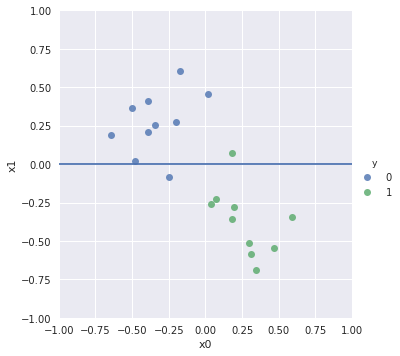

In [96]:
plot_scatter()
plot_boundary(a=0,b=1)

- 식별경계의 위쪽은 0으로 판별하고, 밑은 1로 판변하는 판정식 완성
- 하지만 여전히 2개 값이 정확하게 판별되지 않으므로 변수 `a`와 `b`를 수정하여 경계를 회전
- 식별경계를 회전시키는 함수는 다음과 같이 정의

In [97]:
a = 0.0
b = 1.0
c = 0.0
lr = 0.1

def rotate(direction):
  global a, b, c
  if direction ==1:
    a += lr*-1.0
    b += lr*-1.0
  else:
    a += lr*1.0
    b += lr*1.0

- 정확한 회전 연산식은 아니지만, `a`와 `b`의 값을 `lr`만큼 수정하며 식별경계식을 변경
- 위 함수를 기반으로 학습하는 코드는 아래와 같이 작성 가능

In [98]:
def train():
  global a, b, c
  for i, (x0, x1, y) in dataset.iterrows():
    pred = predict(x0, x1)
    #print(pred, y)
    if pred != y:
      if (y==1 and x1>0) or (y==0 and x1<0):
        rotate(1)
      else:
        rotate(0)
    else:
      pass

- `iterrows()` 함수로 DataFrame의 행을 하나씩 추출 (인덱스, 값1, 값2, ... 값n)
- `y`가 1인데 식별경계보다 위에 있거나, `y`가 0인데 식별경계보다 아래 있는 경우 시계 반대 방향으로 회전시킴
- 예측 함수가 맞다면 `a`, `b` 값에 아무 처리하지 않음
- 위 함수를 1회 실행 시 아래와 같이 변경됨

In [99]:
train()

In [100]:
print(a, b, c)

-0.2 0.8 0.0


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


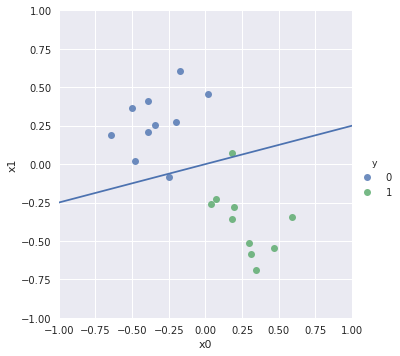

In [101]:
plot_scatter()
plot_boundary(a=a, b=b)

- 1-epoch 학습 결과 2건의 오류를 발견하여 `a`와 `b`는 `2lr`만큼 수정
- 하지만 여전히 잘못된 값을 반환하기에 한번 더 학습 진행

-0.30000000000000004 0.7000000000000001 0.0


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


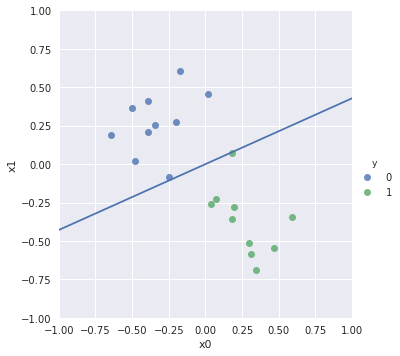

In [102]:
train()
print(a, b, c)
plot_scatter()
plot_boundary(a=a, b=b)

- 2-epoch 학습 결과 3번째 수정 값 이후 오류가 발견되지 않아 추가 학습을 진행하지 않음
- 학습 속도를 높이고자 `lr` 값을 높게 수정한다면 (i.e. `lr = 1.0`) 오히려 학습이 제대로 진행되지 않을 수 있음

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


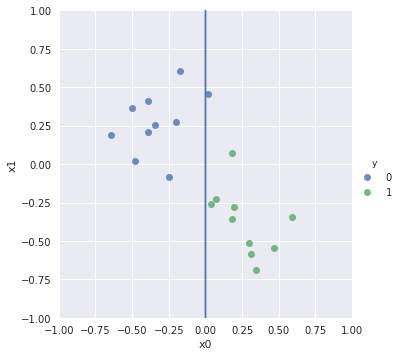

In [103]:
plot_scatter()
plot_boundary(a=1, b=0)

- 반대로 `lr` 값을 0.01처럼 작게 가져간다면 학습 수렴까지 오랜 시간이 걸릴 수 있음